## Computing fidelity metrics

Benchmark the metrics with the metrics proposed in ERASER.

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir("..")

In [5]:
from slalom_explanations.transformer_models import DistilBert, GPT2, Bert, Trainer
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer

In [ ]:
##Print Metrics for YELP

In [16]:
import numpy as np
import torch 

key = "deletion"
model_names = ["gpt2", "bert", "distilbert"]
dataset = "yelp"
layers=6
methods_use = [0,2,3,5,6,7,8,9,10] #[0,2,3,4,5,6,7] #[3,5,6,7,8,9,10] # # #[1,3,4,5,6,7]
res_list, res_std_list = [], []
for k in model_names:
    filename = f"metrics/100_Transformer_{dataset}_{k}_{layers}_pretrained_r7.pt"
    #print(filename)
    res = torch.load(filename)
    res_val = res[key]
    #print(res_val.shape)
    res_val_m = res_val.mean(axis=0)
    res_val_std =  res_val.std(axis=0)/np.sqrt(len(res_val))
    res_str = " & ".join([r"\wstd{" + f"{1-res_val_m[method]:.3f}" +"}{"+ f"{res_val_std[method]:.3f}" +"}" for method in methods_use])
    print(k + " & " + res_str +r"\\")
    res_list.append(res_val_m)
    res_std_list.append(res_val_std)
res_list = np.stack(res_list)
res_std_list = np.stack(res_std_list)

gpt2 & \wstd{0.747}{0.024} & \wstd{0.753}{0.024} & \wstd{0.726}{0.021} & \wstd{0.727}{0.021} & \wstd{0.444}{0.028} & \wstd{0.849}{0.015} & \wstd{0.292}{0.026} & \wstd{0.290}{0.026} & \wstd{0.740}{0.025}\\
bert & \wstd{0.657}{0.038} & \wstd{0.667}{0.038} & \wstd{0.865}{0.012} & \wstd{0.863}{0.013} & \wstd{0.797}{0.022} & \wstd{0.859}{0.013} & \wstd{0.249}{0.028} & \wstd{0.281}{0.029} & \wstd{0.855}{0.017}\\
distilbert & \wstd{0.645}{0.033} & \wstd{0.642}{0.033} & \wstd{0.813}{0.017} & \wstd{0.813}{0.018} & \wstd{0.746}{0.025} & \wstd{0.854}{0.013} & \wstd{0.201}{0.026} & \wstd{0.243}{0.028} & \wstd{0.768}{0.024}\\


/tmp/ipykernel_2292435/2289012677.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res = torch.load(filename)


In [17]:
res_val_m = res_list.mean(axis=0)
res_val_std = res_std_list.mean(axis=0)
print(" & ".join([r"\wstd{" + f"{1-res_val_m[method]:.3f}" +"}{"+ f"{res_val_std[method]:.3f}" +"}" for method in methods_use]))

\wstd{0.683}{0.032} & \wstd{0.687}{0.032} & \wstd{0.801}{0.017} & \wstd{0.801}{0.017} & \wstd{0.663}{0.025} & \wstd{0.854}{0.014} & \wstd{0.247}{0.027} & \wstd{0.271}{0.028} & \wstd{0.788}{0.022}


In [19]:
res_val_std

tensor(0.0108)

## Analyze Multiremoval data

In [245]:
import numpy as np
import torch 
model ="distilbert"
dset = "imdb"
layers = 2
res = torch.load(f"metrics/100_Transformer_{dset}_{model}_{layers}_r7.pt")
arr_fix = np.array(res["multiremoval_mse"])
print(arr_fix.shape)
#if model=="bert":
#res_append = torch.load(f"metrics/lrp_Transformer_{dset}_{model}_{layers}_pretrained_r0.pt")
#arr_fix = np.concatenate((arr_fix, np.array(res_append["multiremoval_mse"])), axis=2)

(100, 10, 10)


/tmp/ipykernel_3020536/3335391140.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  res = torch.load(f"metrics/100_Transformer_{dset}_{model}_{layers}_r7.pt")


In [246]:
arr_fix.shape

(100, 10, 10)

In [247]:
res_dicts_mean = arr_fix.mean(axis=0)

In [248]:
res_dicts_mean[9,:]

array([1.08688894e-01, 3.21568657e+03, 1.76560125e-01, 4.37387785e+01,
       1.31439845e-01, 1.83947119e-01, 4.40696683e+01, 5.89227457e+00,
       1.44337757e-01, 1.89763825e-01])

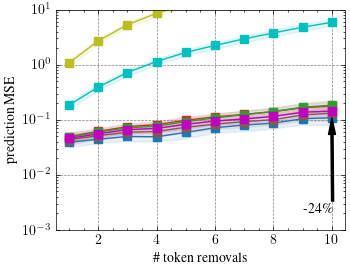

In [249]:
import matplotlib.pyplot as plt
plt.style.use('figures/matplot.mplstyle')
from matplotlib import pyplot

res_dicts_mean = arr_fix.mean(axis=0)
res_dicts_std = arr_fix.std(axis=0)/10
#labels=["SLALOM", "SHAP", "LIME", "Constant", "SLALOM-i-fix"]
labels = ["SLALOM-faith", "lin", "SLALOM-eff", "lin2", "LIME", "SHAP", "Grad", "IG", "LRP", "Constant"]
colors=["tab:blue", "tab:orange", "tab:red", "tab:purple", "tab:brown", "tab:green", "tab:olive", "c", "m", "k", "tab:orange"]
handles =[]
ax = plt.gca()
for i in range(res_dicts_mean.shape[1]):
    if labels[i] in ["SLALOM-faith", "SLALOM-eff", "LIME", "SHAP", "Grad", "IG", "LRP", "Constant"]:
        color_use = colors[i]
        if labels[i] != "Constant":
            plt.fill_between(1+np.arange(res_dicts_mean.shape[0]), res_dicts_mean[:,i]+res_dicts_std[:,i], res_dicts_mean[:,i]-res_dicts_std[:,i], color=color_use, alpha = 0.1)
            handles.append(ax.plot(1+np.arange(res_dicts_mean.shape[0]), res_dicts_mean[:,i], "--" if "fix" in labels[i] else "-", label = labels[i], color=color_use, marker="s")[0])
        else:
            pass
            #handles.append(ax.plot(1+np.arange(res_dicts_mean.shape[0]), res_dicts_mean[:,i], "--", label = labels[i], color=color_use)[0])  
y_lim_low = 0.001
diff = (1.0-(res_dicts_mean[9,0]/res_dicts_mean[9,8]))*100
plt.annotate(f"-{int(diff)}\%", xy = (10, res_dicts_mean[9,0]), xytext=(9, 2*y_lim_low), arrowprops=dict(facecolor='black', width=1.5, headwidth=5))
pyplot.yscale('log')
#plt.ylim([0.1, 1])
plt.ylim([y_lim_low, 10])
#plt.ylim([0.00005, 0.01])
plt.xlabel("\# token removals")
plt.ylabel("prediction MSE")
#plt.legend(loc = "center right",ncol=2) # handles=[handles[0], handles[4], handles[1], handles[2], handles[3]]
plt.gcf().set_size_inches(3.7, 2.9)
plt.tight_layout()
plt.gcf().savefig(f"figures/multiremoval_{model}.pdf")
plt.show()